# Práctica 1: Aprendizaje automático

__Fecha de entrega: XX de YYY de 2022 (CAMBIAR PARA DAR 3 SEMANAS A CADA GRUPO)__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 20__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Juan Pablo Corella Martín__

In [1]:
# acceso a google drive

# from google.colab import drive
# drive.mount('/content/drive')

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `Mall_Customers.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `Customer ID` es el identificador del cliente
  - `Gender` es el género del cliente (Male|Female)
  - `Annual Income` son los ingresos anuales en cientos de dólares del cliente
  - `Age` es la edad del cliente
  - `Spending Score` es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos

In [2]:
# import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/IA2/p2/Mall_Customers.csv', index_col = 0)
# df

In [4]:
import pandas as pd

df = pd.read_csv('./Mall_Customers.csv', index_col=0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [5]:
ageData = df['Age'].describe().transpose()

ageData



count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [6]:

incomeData = df['Annual Income (k$)'].describe().transpose()

print(incomeData)




count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


In [7]:
spendingData = df['Spending Score (1-100)'].describe().transpose()

print(spendingData)


count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Age'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

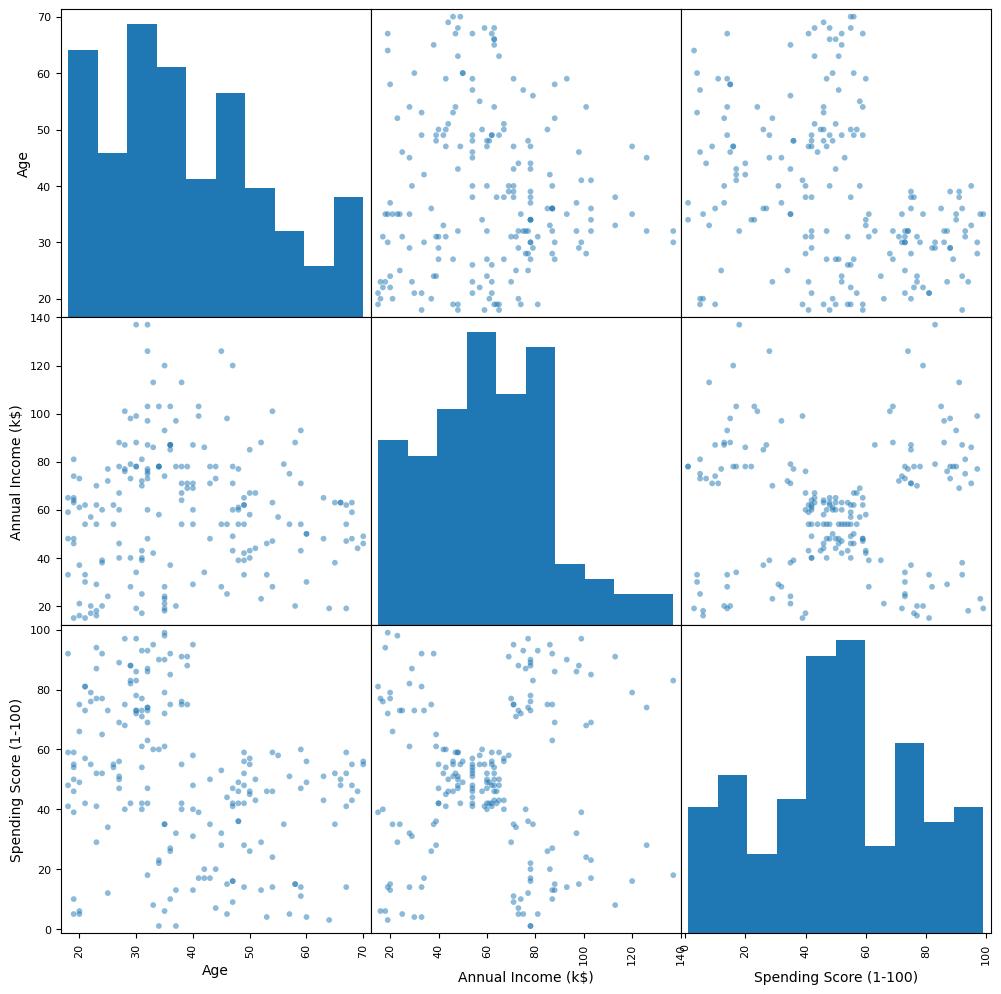

In [8]:
from pandas.plotting import scatter_matrix
%matplotlib inline


scatter_matrix(df, s= 70, figsize=(12, 12), diagonal='hist')


In [9]:
df.corr()

/tmp/ipykernel_130586/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000



### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

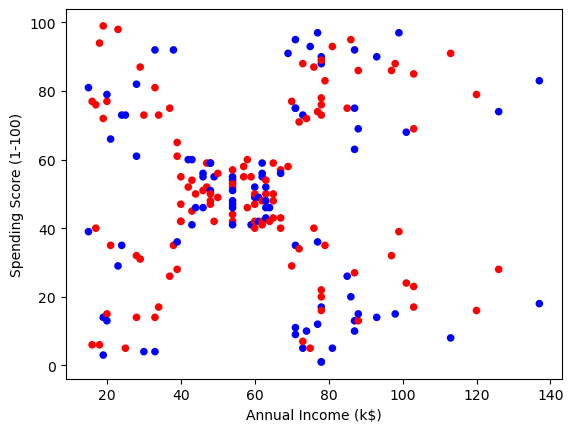

In [10]:
dic_colors = {'Male': 'blue', 'Female': 'red'}
colors = df['Gender'].map(dic_colors)

df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', c=colors)


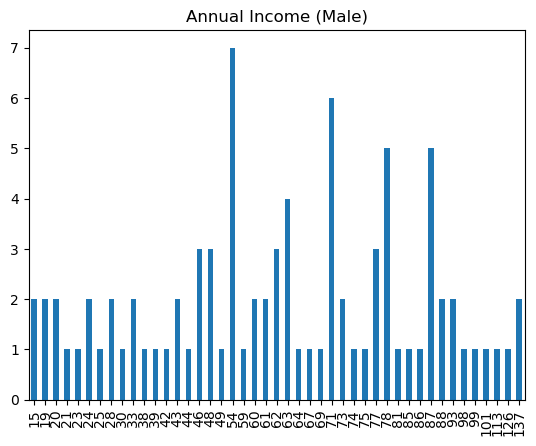

In [11]:
df_hombres = df[df['Gender'] == 'Male']

df_hombres

plot = df_hombres['Annual Income (k$)'].value_counts().sort_index().plot(kind='bar', title='Annual Income (Male)')

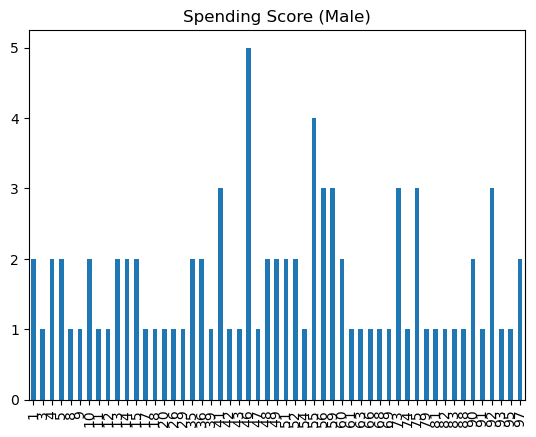

In [12]:
plot = df_hombres['Spending Score (1-100)'].value_counts().sort_index().plot(kind='bar', title='Spending Score (Male)')

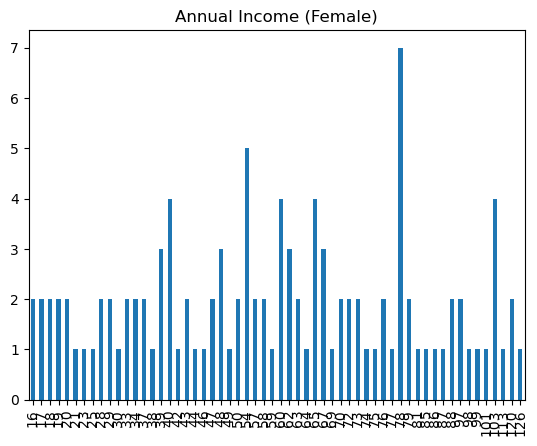

In [13]:
df_mujeres = df[df['Gender'] == 'Female']

df_mujeres

plot = df_mujeres['Annual Income (k$)'].value_counts().sort_index().plot(kind='bar', title="Annual Income (Female)")

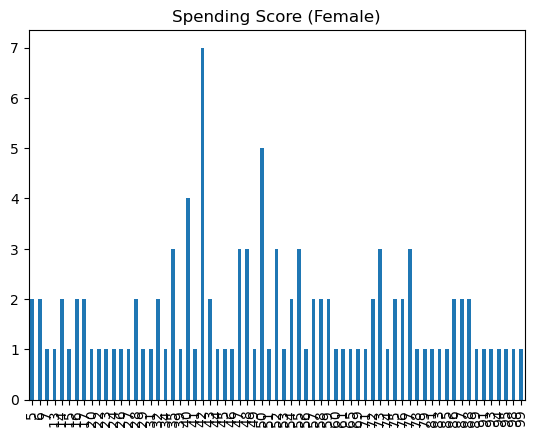

In [14]:
plot = df_mujeres['Spending Score (1-100)'].value_counts().sort_index().plot(kind='bar', title='Spending Score (Female)')


## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables `Annual income`, y `spending score`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de clientes similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [15]:
df = df[["Annual Income (k$)", "Spending Score (1-100)"]].dropna("index", "any")

df

/tmp/ipykernel_130586/3935248350.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df[["Annual Income (k$)", "Spending Score (1-100)"]].dropna("index", "any")


,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [22]:
from sklearn.preprocessing import MinMaxScaler

data_scaled = MinMaxScaler().fit_transform(df)

df_scaled = pd.DataFrame(data=data_scaled, index=df.index, columns=df.columns)


df_scaled.head()


,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,0.000000,0.387755
2,0.000000,0.816327
3,0.008197,0.051020
4,0.008197,0.775510
5,0.016393,0.397959


In [23]:
from sklearn.preprocessing import StandardScaler

data_standard = StandardScaler().fit_transform(df)

# Fase de transformación
df_standard = pd.DataFrame(
    data=data_standard, index=df.index, columns=df.columns)

df_standard.head()


,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


Como las variables no tienen una distribución normal, al estandarizar estaríamos perdiendo esa información, por lo que en este caso tiene más sentido normalizar y preservar así el contexto entre las mismas.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters.

In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [25]:
RANDOM_STATE=333

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 11
score = np.zeros(K_MAX - 2)
davies_boulding = np.zeros(K_MAX -2)
silhouette = np.zeros(K_MAX - 2)

for k in range(2, K_MAX):
    km = KMeans(init="random", n_clusters=k, random_state=RANDOM_STATE)
    km.fit(df_scaled)

    score[k-2] = -1*km.score(df_scaled)
    davies_boulding[k-2] = davies_bouldin_score(df_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(df_scaled, km.labels_)
    

/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

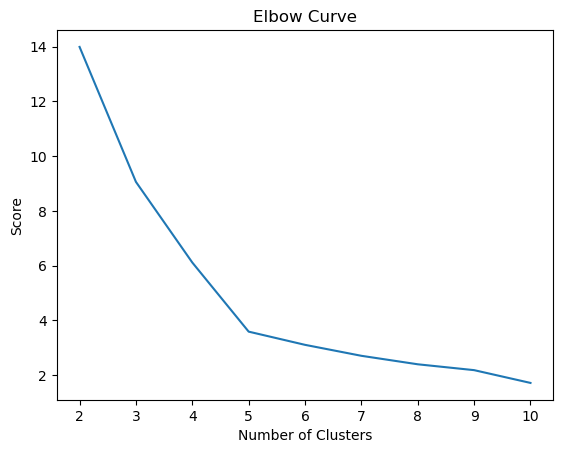

In [27]:
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

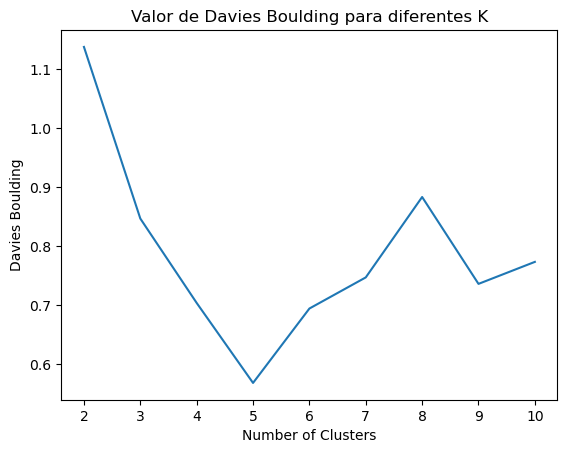

In [28]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding')
plt.title('Valor de Davies Boulding para diferentes K')
plt.show()


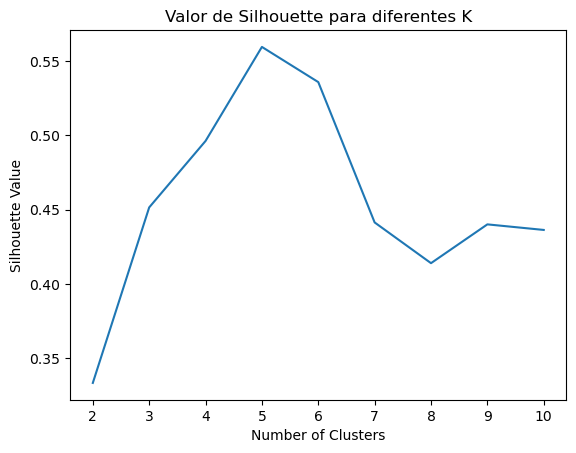

In [29]:
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.title('Valor de Silhouette para diferentes K')
plt.show()


Todas las gráficas nos indican que el valor deseado de clusters es 5.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de clientes quedan en cada cluster? 

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [30]:
km = KMeans(init='random', n_clusters=5, random_state=RANDOM_STATE)
km.fit(df_scaled)

df = df.assign(cluster=pd.Series(data=km.labels_, index=df.index))
df.sort_values(by="cluster").loc[:, ['cluster']]

/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster
CustomerID,
100,0
84,0
83,0
82,0
81,0
...,...
22,4
18,4
46,4


In [31]:
df[df["cluster"] == 0]

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
44,39,61,0
47,40,55,0
48,40,47,0
49,40,42,0
50,40,42,0
...,...,...,...
122,67,40,0
123,69,58,0
127,71,35,0


En este cluster encontramos los individuos con ingresos anuales medios y una puntuación de gasto media.

In [32]:
df[df["cluster"] == 1]

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
125,70,29,1
129,71,11,1
131,71,9,1
135,73,5,1
137,73,7,1
139,74,10,1
141,75,5,1
145,77,12,1
147,77,36,1


En este cluster tenemos a los individuos con un ingreso anual alto y puntuación de gasto baja.

In [33]:
df[df["cluster"] == 2]

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,2
3,16,6,2
5,17,40,2
7,18,6,2
9,19,3,2
11,19,14,2
13,20,15,2
15,20,13,2
17,21,35,2


En este cluster vemos individuos con ingresos anuales y puntuación de gasto bajos.

In [34]:
df[df["cluster"] == 3]

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
124,69,91,3
126,70,77,3
128,71,95,3
130,71,75,3
132,71,75,3
134,72,71,3
136,73,88,3
138,73,73,3
140,74,72,3


En este cluster tenemos ingresos anuales altos y puntuación de gasto alta.

In [35]:
df[df["cluster"] == 4]

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
2,15,81,4
4,16,77,4
6,17,76,4
8,18,94,4
10,19,72,4
12,19,99,4
14,20,77,4
16,20,79,4
18,21,66,4


En este último cluster tenemos ingresos bajos pero puntuación de gasto alta.

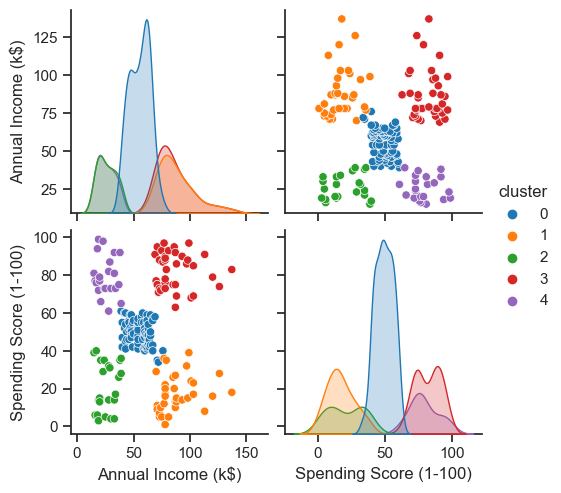

In [37]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(df, hue = "cluster", palette="tab10")

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



In [38]:
df = df[["Annual Income (k$)", "Spending Score (1-100)"]].dropna("index", "any")
df

/tmp/ipykernel_130586/2093645645.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df[["Annual Income (k$)", "Spending Score (1-100)"]].dropna("index", "any")


,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [39]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Crear una instancia del agrupador jerárquico aglomerativo
K_MAX = 11
score = np.zeros(K_MAX - 2)
davies_boulding = np.zeros(K_MAX -2)
silhouette = np.zeros(K_MAX - 2)

for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag.fit(df_scaled)
    
    #score[k-2] = -1*ag.score(df_scaled)
    davies_boulding[k-2] = davies_bouldin_score(df_scaled, ag.labels_)
    silhouette[k-2] = silhouette_score(df_scaled, ag.labels_)

/usr/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` 

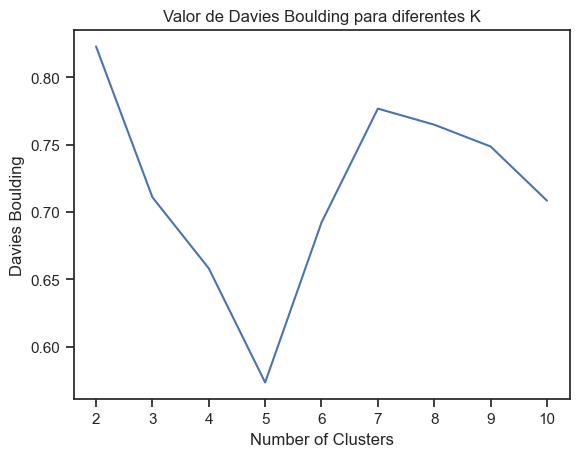

In [40]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding')
plt.title('Valor de Davies Boulding para diferentes K')
plt.show()


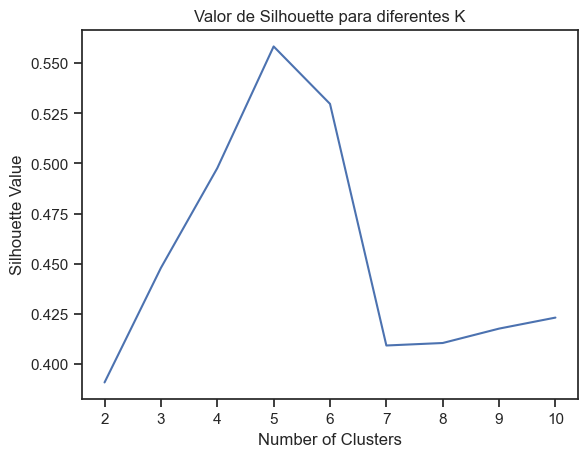

In [41]:
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.title('Valor de Silhouette para diferentes K')
plt.show()

/usr/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


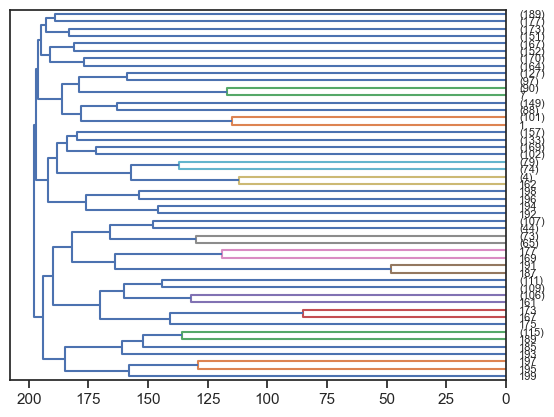

In [49]:
# Sciki-learn no pinta el dendrograma, pero scipy sí, 
# la siguiente función permite usar el modelo ajustado por scikit learn para pintar el dendrograma
# https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    


ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
ag.fit(df_scaled)

# Dibujar los primeros 5 niveles del árbol
levels = 5
plot_dendrogram(ag, p=levels, truncate_mode='level', orientation='left')

# Árbol completo
#plot_dendrogram(ag)